In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

Processed 000000.png
Processed 000001.png
Processed 000002.png
Processed 000003.png
Processed 000004.png
Processed 000005.png
Processed 000006.png
Processed 000007.png
Processed 000008.png
Processed 000009.png
Processed 000010.png
Processed 000011.png
Processed 000012.png
Processed 000013.png
Processed 000014.png
Processed 000015.png
Processed 000016.png
Processed 000017.png
Processed 000018.png
Processed 000019.png
Processed 000020.png
Processed 000021.png
Processed 000022.png
Processed 000023.png
Processed 000024.png
Processed 000025.png
Processed 000026.png
Processed 000027.png
Processed 000028.png
Processed 000029.png
Processed 000030.png
Processed 000031.png
Processed 000032.png
Processed 000033.png
Processed 000034.png
Processed 000035.png
Processed 000036.png
Processed 000037.png
Processed 000038.png
Processed 000039.png
Processed 000040.png
Processed 000041.png
Processed 000042.png
Processed 000043.png
Processed 000044.png
Processed 000045.png
Processed 000046.png
Processed 000

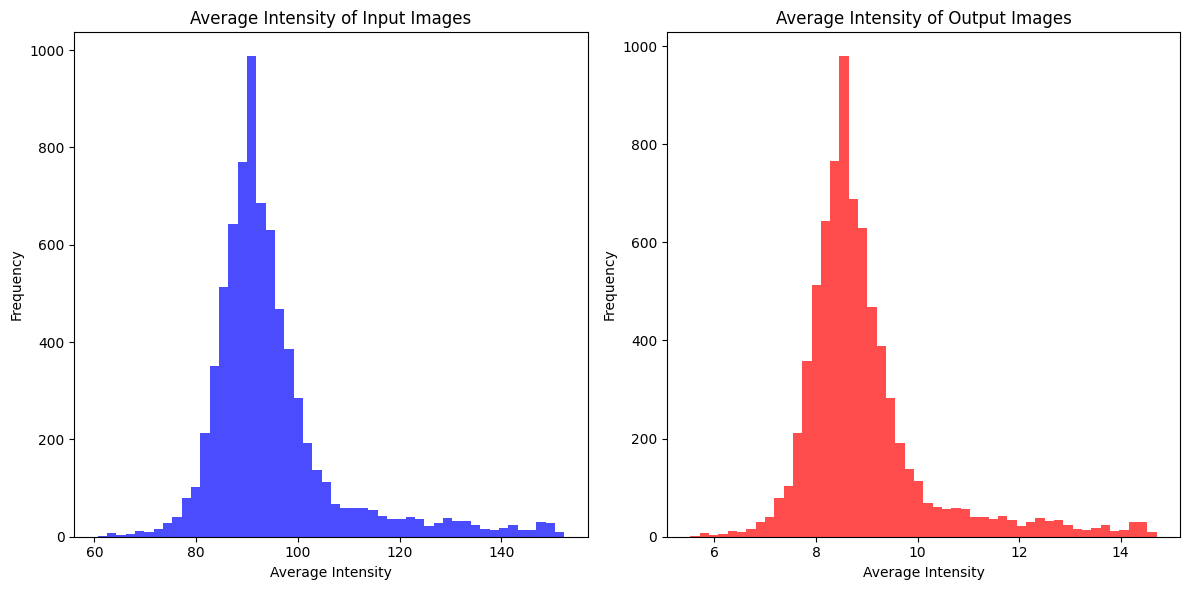

In [6]:
def retinex_decompose(image):

    
    illumination = cv2.GaussianBlur(image, (21, 21), 0)
    reflectance = image / (illumination + 1e-5)
    return illumination, reflectance

def generate_low_light_image(image, factor):
    # Decompose the image
    illumination, reflectance = retinex_decompose(image)
    
    # Generate low light illumination
    low_light_illumination = illumination * factor
    
    # Recompose the image
    low_light_image = low_light_illumination * reflectance
    low_light_image = np.clip(low_light_image, 0, 255).astype(np.uint8)
    
    return low_light_image

def process_images(input_folder, output_folder, factor=0.1):
    # Ensure the output directory exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # List all files in the input directory
    input_files = sorted(os.listdir(input_folder))
    
    input_intensities = []
    output_intensities = []
    
    for filename in input_files:
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)
        
        # Read the input image
        image = cv2.imread(input_path)
        
        if image is None:
            print(f"Failed to read {filename}")
            continue
        
        # Convert image to float32 for processing
        image = image.astype(np.float32)
        
        # Calculate and store the average intensity of the input image
        input_intensity = np.mean(image)
        input_intensities.append(input_intensity)
        
        # Generate low light image
        low_light_image = generate_low_light_image(image, factor)
        
        # Calculate and store the average intensity of the output image
        output_intensity = np.mean(low_light_image)
        output_intensities.append(output_intensity)
        
        # Save the result
        cv2.imwrite(output_path, low_light_image)
        print(f"Processed {filename}")
    
    return input_intensities, output_intensities

def plot_histograms(input_intensities, output_intensities):
    plt.figure(figsize=(12, 6))

    # Plot histogram for input image intensities
    plt.subplot(1, 2, 1)
    plt.hist(input_intensities, bins=50, color='blue', alpha=0.7)
    plt.title('Average Intensity of Input Images')
    plt.xlabel('Average Intensity')
    plt.ylabel('Frequency')

    # Plot histogram for output image intensities
    plt.subplot(1, 2, 2)
    plt.hist(output_intensities, bins=50, color='red', alpha=0.7)
    plt.title('Average Intensity of Output Images')
    plt.xlabel('Average Intensity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Example usage
input_folder = 'C:/Users/cim-security/Desktop/archive/testing/image_2'
output_folder = 'C:/Users/cim-security/Desktop/Obj/Low_lit/Testing/images'

input_intensities, output_intensities = process_images(input_folder, output_folder, factor=0.1)
plot_histograms(input_intensities, output_intensities)
